---

# **Data Collection**

## Objectives

* Fetch data from Kaggle and prepare it for further processing

## Inputs

Environment variables
* KAGGLE_KEY: Kaggle API token 
* KAGGLE_DATASET_PATH: Location for dataset in Kaggle
* LOCAL_DATASET_PATH: Local file system path where all data is stored 

## Outputs

* Missing Value Stats: statistics about missing values
* Clean Dataset: dataset without missing values less than 10%

## Additional Comments | Insights | Conclusions

* 


---

### 1. Basic setup

###### Import Python packages

In [1]:
import os
import shutil
import zipfile
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import stat
from dotenv import load_dotenv
from sklearn.model_selection import train_test_split

###### Load environment variables

In [2]:
load_dotenv()

True

###### Start from clean slate by removing all files

In [3]:
for filename in os.listdir(os.getenv("LOCAL_DATASET_PATH")):
    filepath = os.path.join(os.getenv("LOCAL_DATASET_PATH"), filename)
    try:
        shutil.rmtree(filepath)
    except OSError:
        os.remove(filepath)

os.listdir(os.getenv("LOCAL_DATASET_PATH")) == []

True

### 2. Download data

###### Download housing data from Kaggle to local filesystem

In [4]:
! kaggle datasets download -d {os.getenv("KAGGLE_DATASET_PATH")} -p {os.getenv("LOCAL_DATASET_PATH")} --force


  0%|          | 0.00/49.6k [00:00<?, ?B/s]
100%|##########| 49.6k/49.6k [00:00<00:00, 457kB/s]
100%|##########| 49.6k/49.6k [00:00<00:00, 449kB/s]


###### Check if zip file exists in the desired folder

In [5]:
os.listdir(os.getenv("LOCAL_DATASET_PATH")) == [os.getenv("DATASET_ZIPFILE_NAME")]

True

###### Unzip the zip file and remove it. It should extract a meta data file in the root and a few other files in a subfolder

In [6]:
zipfile_path = os.path.join(os.getenv("LOCAL_DATASET_PATH"), "housing-prices-data.zip")
with zipfile.ZipFile(zipfile_path) as zip_ref:
    zip_ref.extractall(os.getenv("LOCAL_DATASET_PATH"))

os.remove(zipfile_path)
os.listdir(os.getenv("LOCAL_DATASET_PATH"))

['house-metadata.txt', 'house-price-20211124T154130Z-001']

###### Move all files to the root folder and remove the subfolders. Now, it should have three files

In [7]:
zip_extraction_path = os.path.join(os.getenv("LOCAL_DATASET_PATH"), "house-price-20211124T154130Z-001")

for root, dirs, files in os.walk(zip_extraction_path):
    path = root.split(os.sep)
    for file in files:
        if not os.path.isdir(file):
            shutil.move(os.path.join(*path, file), os.path.join(os.getenv("LOCAL_DATASET_PATH"), file))

shutil.rmtree(zip_extraction_path)
assert set(os.listdir(os.getenv("LOCAL_DATASET_PATH"))) == {
    os.getenv("HOUSING_RECORDS_FILENAME"), 
    os.getenv("INHERITED_HOUSES_FILENAME"),
    os.getenv("HOUSING_DATA_DICTIONARY")
}

---

### 3. Read Data

###### Housing records 

In [8]:
housing_records = pd.read_csv(os.path.join(os.getenv("LOCAL_DATASET_PATH"), os.getenv("HOUSING_RECORDS_FILENAME")))
assert housing_records.shape == (1460, 24)
housing_records.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


###### Inherited houses 

In [9]:
inherited_houses = pd.read_csv(os.path.join(os.getenv("LOCAL_DATASET_PATH"), os.getenv("INHERITED_HOUSES_FILENAME")))
assert inherited_houses.shape == (4, 23)
inherited_houses.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,896,0,2,No,468.0,Rec,270.0,0,730.0,Unf,...,11622,80.0,0.0,0,6,5,882.0,140,1961,1961
1,1329,0,3,No,923.0,ALQ,406.0,0,312.0,Unf,...,14267,81.0,108.0,36,6,6,1329.0,393,1958,1958
2,928,701,3,No,791.0,GLQ,137.0,0,482.0,Fin,...,13830,74.0,0.0,34,5,5,928.0,212,1997,1998
3,926,678,3,No,602.0,GLQ,324.0,0,470.0,Fin,...,9978,78.0,20.0,36,6,6,926.0,360,1998,1998


### 4. Analyze missing values

In [10]:
def get_missing_data(data):
    na_data = pd.DataFrame(data.isna().sum(), columns=["count"])
    na_data["percentage"] = round(na_data["count"] / data.shape[0] * 100, 2)
    na_data["should_remove"] = na_data["percentage"] >= 10
    na_data = na_data\
        .convert_dtypes()\
        .sort_values(by="count", ascending=False)\
        .reset_index()\
        .rename(columns={"index":"column"}) 
    return na_data

###### Analysis of housing records dataset

C:\Users\ahmmu\AppData\Local\Temp\ipykernel_24364\1293486560.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


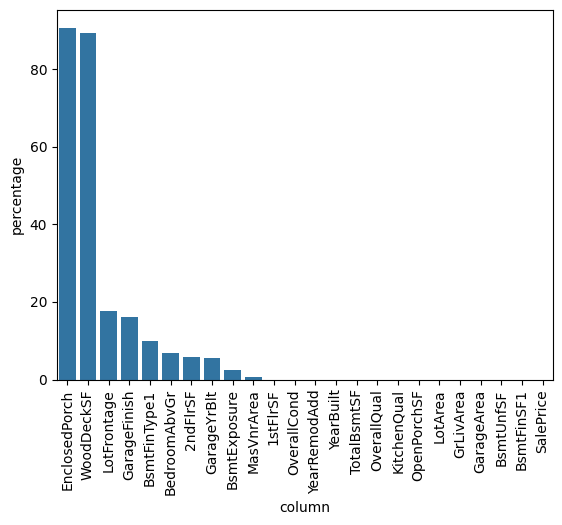

In [11]:
na_housing_records = get_missing_data(housing_records)
ax = sns.barplot(y=na_housing_records["percentage"], x=na_housing_records["column"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

###### Analysis of inherited houses dataset 

In [12]:
na_inherited_houses = get_missing_data(inherited_houses)
assert na_inherited_houses["count"].sum() == 0

###### Save housing records missing data analysis

In [13]:
na_housing_records.to_csv(os.path.join(os.getenv("LOCAL_DATASET_PATH"), os.getenv("NA_STATS_HOUSING_RECORDS_FILENAME")), index=False)

In [14]:
assert set(os.listdir(os.getenv("LOCAL_DATASET_PATH"))) == {
    os.getenv("HOUSING_RECORDS_FILENAME"), 
    os.getenv("INHERITED_HOUSES_FILENAME"),
    os.getenv("HOUSING_DATA_DICTIONARY"),
    os.getenv("NA_STATS_HOUSING_RECORDS_FILENAME")
}

---